------------------
```markdown
# Copyright © 2024 Meysam Goodarzi
This notebook is licensed under CC BY-NC 4.0 with the following amandments:
- Individuals may use, share, and adapt this material for non-commercial purposes with attribution.
- Institutions/Companies must obtain written consent to use this material, except for nonprofits.
- Commercial use is prohibited without permission.  
Contact: analytica@meysam-goodarzi.com
```
------------------------------
❗❗❗ **IMPORTANT**❗❗❗ **Create a copy of this notebook**

In order to work with this Google Colab you need to create a copy of it. Please **DO NOT** provide your answers here. Instead, work on the copy version. To make a copy:

**Click on: File -> save a copy in drive**

Have you successfully created the copy? if yes, there must be a new tab opened in your browser. Now move to the copy and start from there!

----------------------------------------------


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from scipy.stats import beta, gaussian_kde, norm, t, f, chi2

# Frequentist Statistics
Let us imagine a scenario where we want to obtain the distribution of a feature in a population, e.g., height, wealth. In most of the cases, we do not have access to the whole population, therefore we select a large sample and obtain the distribution parameters $\theta$. **The basic assumption** is that, the sample would ideally represent the population. $\theta$ could be for example a vector containing the paramers of a Gaussian, i.e., $\mu$ and $\sigma$.

Given above description, the question we often seek to answer is that if we receive a new set of data $\mathcal{D}_s$, how can we determine if it has been sampled from the same population represented by parameter $\theta.$

The **frequentist answer** is that we **assume** that in fact the data $\mathcal{D}_s$ **is** drawn from the distribution represented by $\theta$. This is called **null hypothesis ($H_0$)**. If $H_0$ is true, mean of $\mathcal{D}_s$ should not be too far away (!) from the mean of population. The question is then how to determine how far mean of $\mathcal{D}_s$ is from the population mean? To do so, we need to obtain the distribution of the mean. Then, depending on how many standard deviations we are far from the mean, we can draw a conclusion. Let us assume the population distribution is Gaussian distributed, i.e., $\mathcal{N}(\mu, \sigma^2).$ Now, if we draw multiple sample datasets from the population, we can write:

$$\mathcal{D}_i \sim \mathcal{N}(\mu_i, \sigma_i^2)\ \forall i = 0, \cdots, N.$$

From the means of above sample datasets, we can form the distribution of the mean. According to the frequentist statistics (and the help of Central Limit Theorem ([CLT](https://en.wikipedia.org/wiki/Central_limit_theorem)), average of above datasets must have the same mean as the population. That can be summarized as:

$$\frac{1}{N}\sum_i^N\mu_i \approx \mu$$

Where $\mu$ denotes the population mean, to which do not have a direct access. Given above, what the frequentist statistics states is that, if our assumption (null hypothesis) is true, then:

$$\frac{1}{N}\sum_i^N\mu_i \approx \mu \approx \mu_s$$

We note that the standard deviation of the distribution of means (we call it standard error) is given by

$$ \text{Standard Error (SE)} =  \sigma_{se} = \frac{\sigma}{\sqrt{N}}.$$

$\sigma_{se}$ converges to zero if $N$ is big enough, meaning that the distribution of mean of datasets $\mathcal{D}_i$ is going to converge to the delta function located at $\mu$. Now if $\mathcal{D}_s$ is to be one of the $\mathcal{D}_i,$ its mean should belong to the distribution of means of the datasets $\mu_{\mu} \sim \mathcal{N}(\mu, \sigma_{se}^2).$ In other words, the symbol $\approx$ means $\mu_s$ should not be far away from the population mean $\mu.$ To check whether this is true or not, we need to compute the difference between $\mu_s$ and $\mu$ in terms of $\sigma_{se}$. Check the below figure.

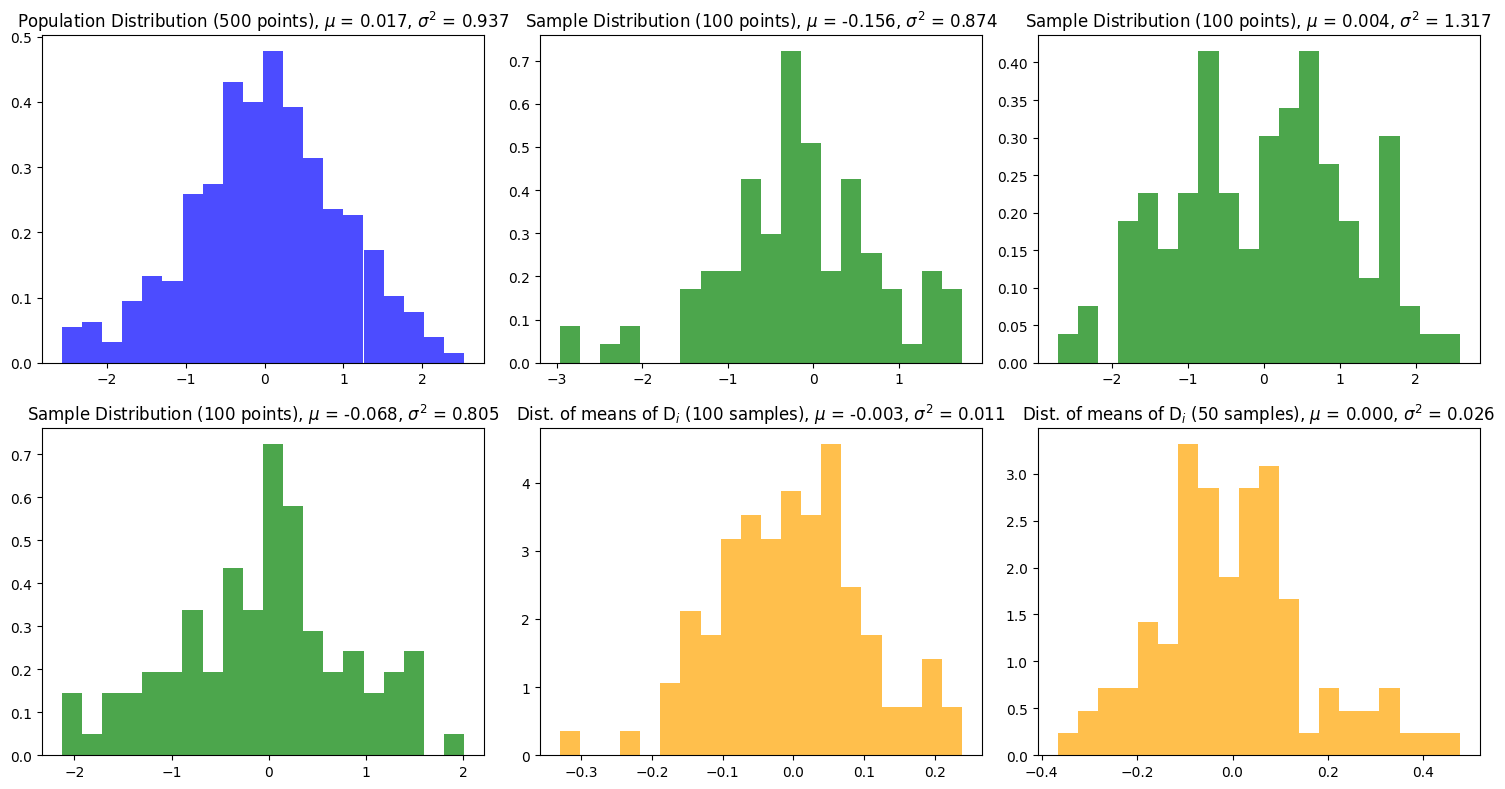

In [ ]:
# Create figure and subplots
fig, axs = plt.subplots(2, 3, figsize=(15, 8))
bins = 20

# Histogram of 1000 data points sampled from a Gaussian distribution with mu = 0 and sigma = 1
data_1000 = np.random.normal(loc=0, scale=1, size=500)
mu, var = np.mean(data_1000), np.var(data_1000, ddof=1)
axs[0, 0].hist(data_1000, bins=bins, alpha=0.7, color='blue', density="True")
axs[0, 0].set_title(r'Population Distribution (500 points), $\mu$ = %.3f, $\sigma^2$ = %.3f'%(mu, var))

# Histogram of 100 data points sampled from the same distribution
data_100 = np.random.normal(loc=0, scale=1, size=100)
mu, var = np.mean(data_100), np.var(data_100, ddof=1)
axs[0, 1].hist(data_100, bins=bins, alpha=0.7, color='green', density="True")
axs[0, 1].set_title('Sample Distribution (100 points), $\mu$ = %.3f, $\sigma^2$ = %.3f'%(mu, var))

# Histogram of another 100 data points sampled from the same distribution
data_100 = np.random.normal(loc=0, scale=1, size=100)
mu, var = np.mean(data_100), np.var(data_100, ddof=1)
axs[0, 2].hist(data_100, bins=bins, alpha=0.7, color='green', density="True")
axs[0, 2].set_title('Sample Distribution (100 points), $\mu$ = %.3f, $\sigma^2$ = %.3f'%(mu, var))

# Histogram of another 100 data points sampled from the same distribution
data_100 = np.random.normal(loc=0, scale=1, size=100)
mu, var = np.mean(data_100), np.var(data_100, ddof=1)
axs[1, 0].hist(data_100, bins=bins, alpha=0.7, color='green', density="True")
axs[1, 0].set_title('Sample Distribution (100 points), $\mu$ = %.3f, $\sigma^2$ = %.3f'%(mu, var))

# Histogram of means of D_i. Each sample dataset has 100 iid points
mu, var = [], []
for i in range(100):
  data_100_var = np.random.normal(loc=0.0, scale=1, size=100)
  mu += [np.mean(data_100_var)]
  var += [np.var(data_100_var, ddof=1)]
mu = np.array(mu)
var = np.array(var)
axs[1, 1].hist(mu, bins=bins, alpha=0.7, color='orange', density="True")
axs[1, 1].set_title(r'Dist. of means of D$_i$ (100 points), $\mu$ = %.3f, $\sigma^2$ = %.3f'%(np.mean(mu), np.var(mu)))

# Histogram of means of D_i. Each sample dataset has 50 iid points
mu, var = [], []
for i in range(100):
  data_50_var = np.random.normal(loc=0.0, scale=1, size=50)
  mu += [np.mean(data_50_var)]
  var += [np.var(data_50_var, ddof=1)]
mu = np.array(mu)
var = np.array(var)
axs[1, 2].hist(mu, bins=bins, alpha=0.7, color='orange', density="True")
axs[1, 2].set_title(r'Dist. of means of D$_i$ (50 points), $\mu$ = %.3f, $\sigma^2$ = %.3f'%(np.mean(mu), np.var(mu)))

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()


## Hypothesis Testing: Z-test
We formulate two hypotheses:

- **Null Hypothesis (H$_0$)**: There is no difference between the population distribution parameters and that of the $D_s$.

- **Alternative Hypothesis (H$_a$)**: There is a difference between them.

We use a statistical test to determine if we can reject the null hypothesis in favor of the alternative hypothesis. Given above formulation, we calculate the distance between the $\mu_s$ and the population mean $\mu$ in terms of the $\sigma_{se}$. That is
$$Z = \frac{\mu_s-\mu}{\sigma_{se}}$$

### Decision Making

Based on the p-value computed using the $Z$ score calculated above, we can decide whether to reject the null hypothesis. Typically, a significance level (alpha) of 0.05 is used.

- If p-value $\leq \alpha$: Reject the null hypothesis (significant difference)
- If p-value $> \alpha$: Fail to reject the null hypothesis (no significant difference)

**Question:** How would you calculate the p-value mathematically?

**Hint:** Think of CDF function.

<!--
# Copyright © 2024 Meysam Goodarzi
This notebook is licensed under CC BY-NC 4.0 with the following amandments:
- Individual may use, share, and adapt this material for non-commercial purposes with attribution.
- Institutions/Companies must obtain written consent to use this material, except for nonprofits.
- Commercial use is prohibited without permission.  
Contact: analytica@meysam-goodarzi.com.
-->


--------------------------
#### Exercise 1
Suppose a hospital claims that the average recovery time for patients after a certain surgery is 30 days with a known standard deviation of 5 days. A new surgical technique is introduced, and a random sample of 40 patients undergoes the new technique. Here is the recorded recovery times:
$$[30, 32, 24, 26, 27, 29, 24, 28, 29, 36,\\
   31, 30, 23, 22, 28, 25, 25, 24, 28, 34,\\
   30, 32, 27, 21, 29, 27, 24, 28, 29, 24,\\
   30, 32, 24, 29, 26, 23, 26, 24, 24, 36]$$

We want to test if the average recovery time using the new technique is significantly less than 30 days at the 5% significance level.

z-score =  2.490 
 p-value =  0.013 



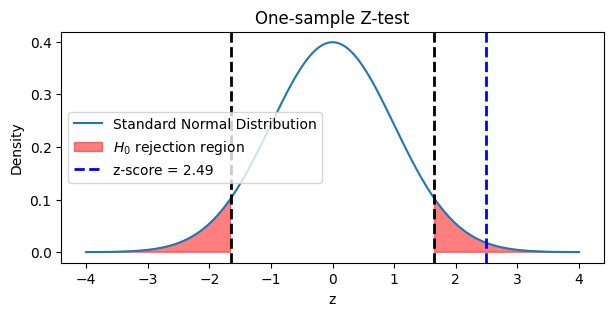

In [ ]:
# Null hypothesis H_0: mu = 30
# Alternative hypothesis H_a: mu != 30

# Data for 40 patients
data = [34, 32, 24, 26, 27, 29, 24, 29, 29, 36,
        31, 30, 21, 22, 28, 25, 31, 24, 28, 34,
        36, 34, 27, 29, 29, 27, 28, 28, 29, 24,
        28, 32, 31, 29, 26, 29, 26, 24, 24, 36]

# population mean
mu = 30
# sample mean
mu_s = np.mean(data)

n = len(data)  # Sample size

# standard error
sigma_se = sigma / np.sqrt(n)

# Calculate the z tatistic
z_score = # Your code

# Calculate p-value
p_value = # Your code
print(f"z-score = {z_score: .3f}", "\n",
      f"p-value = {p_value: .3f}", "\n")

x = np.linspace(-4, 4, 400)
y = norm.pdf(x)
alpha = 0.025
z_critical = norm.ppf(1 - alpha)

plt.figure(figsize=(7, 3))
plt.plot(x, y, label='Standard Normal Distribution')
plt.fill_between(x, 0, y, where=(x < -z_critical) | (x > z_critical), color='red', alpha=0.5, label='$H_0$ rejection region')
plt.axvline(z_score, color='blue', linestyle='dashed', linewidth=2, label=f'z-score = {z_score:.2f}')
plt.axvline(-z_critical, color='black', linestyle='dashed', linewidth=2)
plt.axvline(z_critical, color='black', linestyle='dashed', linewidth=2)
plt.title('One-sample Z-test')
plt.legend()
plt.xlabel('z')
plt.ylabel('Density')
plt.show()

---------------------------
#### Exercise 2
Suppose a website wants to test a new feature to see if it increases the average time users spend on the site. Historically, users spend an average of 5 minutes on the site (population mean, $\mu_0 = 5$ minutes) with a known standard deviation of 2 minutes ($\sigma = 2$ minutes).

After implementing the new feature, a sample of 100 users ($n=100$) shows that the average time spent on the site is 5.3 minutes ($\bar{x} = 5.3$ minutes). We want to test if the new feature has significantly increased the average time users spend on the site at the 5% significance level ($\alpha = 0.05$).

z-score =  1.500 
 p-value =  0.134 



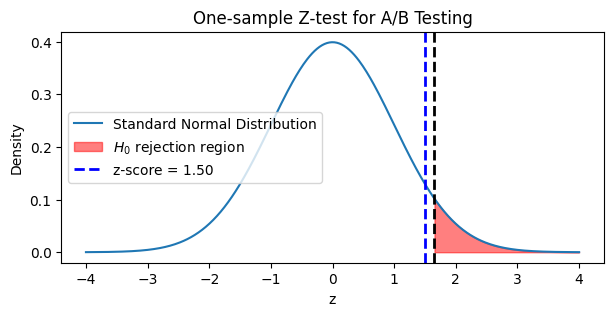

In [ ]:
# Data
mu = 5
mu_s = 5.3
sigma = 2
sample_size = 100

# Calculate the z statistic
z_score = # Your code
p_value = # Your code
print(f"z-score = {z_score: .3f}", "\n",
      f"p-value = {p_value: .3f}", "\n")

# Critical z-value for one-tailed test at alpha = 0.05
alpha = 0.025
z_critical = norm.ppf(1 - alpha)

# Plot the z-distribution and the critical regions
x = np.linspace(-4, 4, 400)
y = norm.pdf(x)

plt.figure(figsize=(7, 3))
plt.plot(x, y, label='Standard Normal Distribution')
plt.fill_between(x, 0, y, where=(x < -z_critical) | (x > z_critical), color='red', alpha=0.5, label='$H_0$ rejection region')
plt.axvline(z_score, color='blue', linestyle='dashed', linewidth=2, label=f'z-score = {z_score:.2f}')
plt.axvline(-z_critical, color='black', linestyle='dashed', linewidth=2)
plt.axvline(z_critical, color='black', linestyle='dashed', linewidth=2)
plt.title('One-sample Z-test for A/B Testing')
plt.legend()
plt.xlabel('z')
plt.ylabel('Density')
plt.show()


----------------------------------
## Hypothesis Testing: t-test
We again formulate two hypotheses:

- **Null Hypothesis (H$_0$)**: There is no difference between the population distribution parameters and that of the $D_s$.

- **Alternative Hypothesis (H$_a$)**: There is a difference between them.

We use a statistical test to determine if we can reject the null hypothesis in favor of the alternative hypothesis. However, if the number of samples in each dataset $\mathcal{D_i}$ is not big enough, in addition to the mean, the variance is also considered to be random. The distribution of the variance is proven to follow the $\chi^2$ (chi-squared) distribution. Here is how the $\chi^2$ distribution looks like:

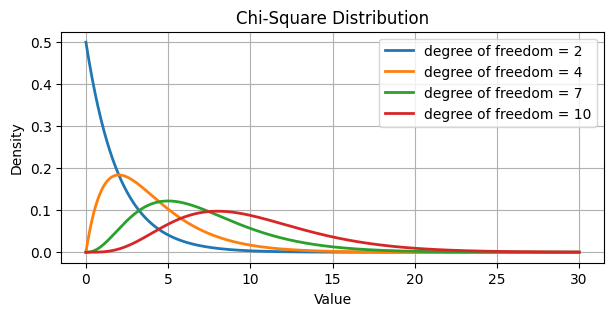

In [ ]:
# degrees of freedom
dfs = [2, 4, 7, 10]

# Generate chi-square distributed data
x = np.linspace(0, 30, 1000)

# Plot the chi-square distribution
plt.figure(figsize=(7, 3))
for df in dfs:
  y = chi2.pdf(x, df)
  plt.plot(x, y, lw=2, label=f'degree of freedom = {df}')
plt.title(f'Chi-Square Distribution')
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend(loc='best')
plt.grid(True)
plt.show()


Now let us take a look on the distribution of $\sigma^2_i$.

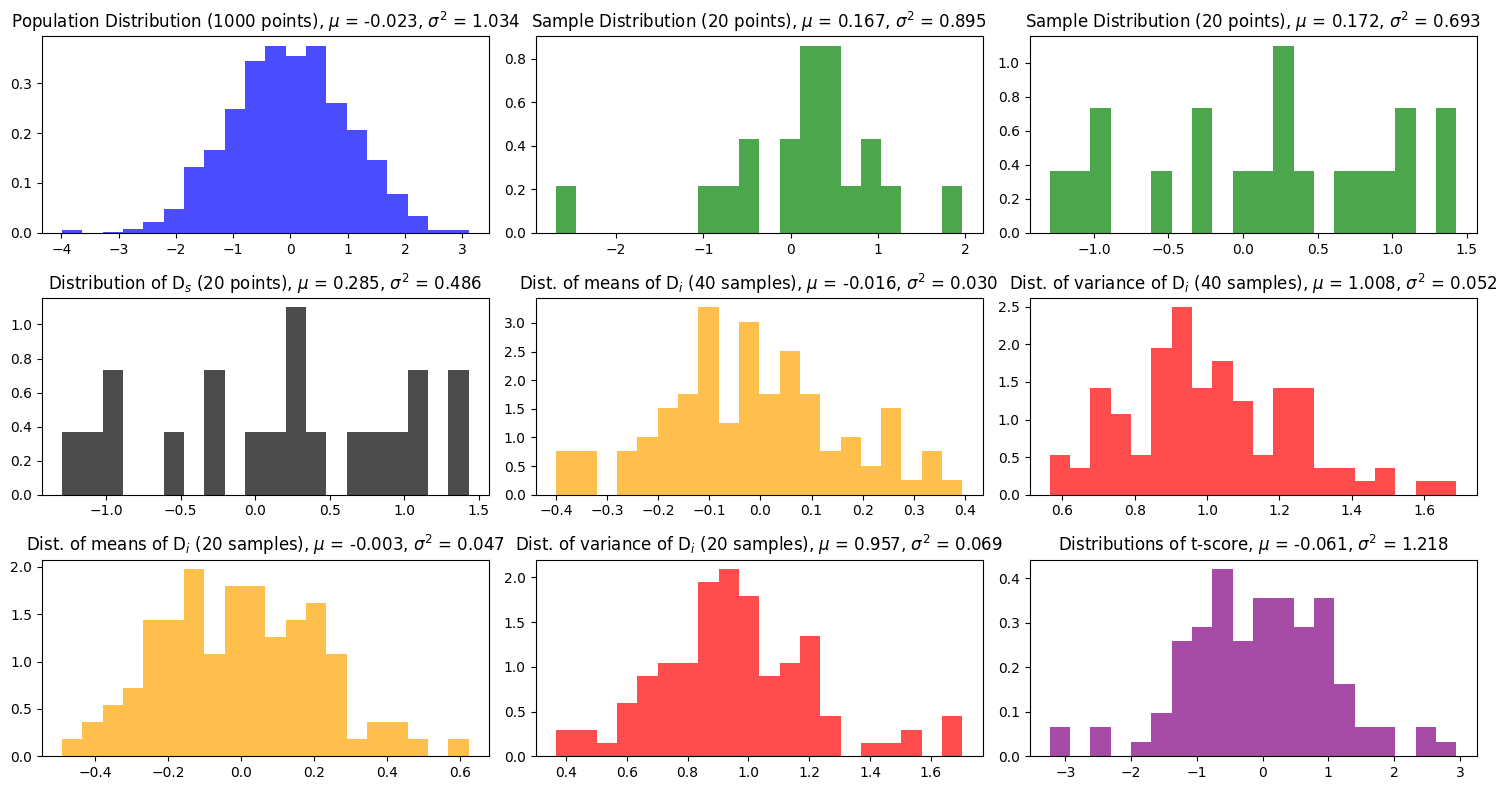

In [ ]:
# Create figure and subplots
fig, axs = plt.subplots(3, 3, figsize=(15, 8))
bins = 20

# Histogram of 500 data points sampled from a Gaussian distribution with mu = 0 and sigma = 1
data_1000 = np.random.normal(loc=0, scale=1, size=1000)
mu, var = np.mean(data_1000), np.var(data_1000, ddof=1)
axs[0, 0].hist(data_1000, bins=bins, alpha=0.7, color='blue', density="True")
axs[0, 0].set_title(r'Population Distribution (1000 points), $\mu$ = %.3f, $\sigma^2$ = %.3f'%(mu, var))

# Histogram of 20 data points sampled from the same distribution
data_20 = np.random.normal(loc=0, scale=1, size=20)
mu, var = np.mean(data_20), np.var(data_20, ddof=1)
axs[0, 1].hist(data_20, bins=bins, alpha=0.7, color='green', density="True")
axs[0, 1].set_title('Sample Distribution (20 points), $\mu$ = %.3f, $\sigma^2$ = %.3f'%(mu, var))

# Histogram of another 20 data points sampled from the same distribution
data_20 = np.random.normal(loc=0, scale=1, size=20)
mu, var = np.mean(data_20), np.var(data_20, ddof=1)
axs[0, 2].hist(data_20, bins=bins, alpha=0.7, color='green', density="True")
axs[0, 2].set_title('Sample Distribution (20 points), $\mu$ = %.3f, $\sigma^2$ = %.3f'%(mu, var))

# Histogram of another 20 data points sampled from the same distribution
data_20_s = np.random.normal(loc=0.0, scale=1, size=20)
mu, var = np.mean(data_20_s), np.var(data_20_s, ddof=1)
axs[1, 0].hist(data_20, bins=bins, alpha=0.7, color='black', density="True")
axs[1, 0].set_title(r'Distribution of D$_{s}$ (20 points), $\mu$ = %.3f, $\sigma^2$ = %.3f'%(mu, var))

# Histogram of means and variances of D_i. Each sample dataset has 40 iid points
mu, var = [], []
for i in range(100):
  data_40_var = np.random.normal(loc=0.0, scale=1, size=40)
  mu += [np.mean(data_40_var)]
  var += [np.var(data_40_var, ddof=1)]
mu = np.array(mu)
var = np.array(var)
axs[1, 1].hist(mu, bins=bins, alpha=0.7, color='orange', density="True")
axs[1, 1].set_title(r'Dist. of means of D$_i$ (40 points), $\mu$ = %.3f, $\sigma^2$ = %.3f'%(np.mean(mu), np.var(mu)))
axs[1, 2].hist(var, bins=bins, alpha=0.7, color='red', density="True")
axs[1, 2].set_title(r'Dist. of variance of D$_i$ (40 points), $\mu$ = %.3f, $\sigma^2$ = %.3f'%(np.mean(var), np.var(var)))

# Histogram of means and variances of D_i. Each sample dataset has 20 iid points
mu, var = [], []
for i in range(100):
  data_20_var = np.random.normal(loc=0.0, scale=1, size=20)
  mu += [np.mean(data_20_var)]
  var += [np.var(data_20_var, ddof=1)]
mu = np.array(mu)
var = np.array(var)
axs[2, 0].hist(mu, bins=bins, alpha=0.7, color='orange', density="True")
axs[2, 0].set_title(r'Dist. of means of D$_i$ (20 samples), $\mu$ = %.3f, $\sigma^2$ = %.3f'%(np.mean(mu), np.var(mu)))
axs[2, 1].hist(var, bins=bins, alpha=0.7, color='red', density="True")
axs[2, 1].set_title(r'Dist. of variance of D$_i$ (20 samples), $\mu$ = %.3f, $\sigma^2$ = %.3f'%(np.mean(var), np.var(var)))

t = mu/(var/20)**.5
axs[2, 2].hist(t, bins=bins, alpha=0.7, color='purple', density="True")
axs[2, 2].set_title(r'Distributions of t-score, $\mu$ = %.3f, $\sigma^2$ = %.3f'%(np.mean(t), np.var(t)))

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()


### t-distribution:
Let us assume the random variable T is defined as $T = \frac{X}{\sqrt{Y}}$ where $X \sim \mathcal{N}(\mu_X, \sigma_X^2)$ and $Y \sim \chi^2_k$ where $\chi^2_k$ denotes the chi-squared distribution with $k$ degree of freedom. The question that we are asking here is what is the distribution of $T$?

We know that $\frac{\mathcal{N}(0, 1)}{\sqrt{\frac{\chi^2_k}{k}}}$ has t-distribtuion with $k$ degree of freedom ($t_k$). Random variable T can be written as $\frac{\sigma_X\mathcal{N}(0, 1) + \mu_X}{\sqrt{\frac{\chi^2_k}{k}}}$ which can be proven to have a t-distribution too, albiet [non-central t-distribution](https://en.wikipedia.org/wiki/Noncentral_t-distribution).

Let us now examine the Z score presented in the Z score formula. We call it $T$ this time instead of $Z.$

$$T = \frac{\mu_s-\mu}{\sigma_{se}}$$

We know that the numinator is normally distributed and can be in general written as $\sigma\mathcal{N}(0, 1) + (\mu_s-\mu)$ while the denuminator is

$$ \sigma_{se} = \sqrt{\frac{1}{N^2}\sum_i^N\sigma_i^2} = \frac{\sigma_s}{\sqrt{N}} = \frac{\sqrt{\frac{1}{N-1}\sum_i^{N}(Y_i-\bar{Y})^2}}{\sqrt{N}} \sim \frac{1}{\sqrt{N}} \sqrt{\frac{\chi^2_{N-1}}{N-1}}.$$

Finally we can write
$$T \sim \sqrt{N}\left(\frac{\sigma W + (\mu_s-\mu)}{\sqrt{V}}\right) $$ where
$$ W \sim \mathcal{N}(0, 1),\ \text{and}\ V\sim \frac{\chi_{N-1}^2}{N-1}.$$
As mentioned before, the above distribution turns out to be [non-central t-distribution](https://en.wikipedia.org/wiki/Noncentral_t-distribution) with $N$ degree of freedom.

### Decision Making

Based on the p-value computed using the $t$ score calculated above, we can decide whether to reject the null hypothesis. Typically, a significance level (alpha) of 0.05 is used.

- If p-value $\leq \alpha$: Reject the null hypothesis (significant difference)
- If p-value $> \alpha$: Fail to reject the null hypothesis (no significant difference)

**Question:** How do we calculate the p-value mathematically?


-------------
#### Exercise 3
A researcher wants to test the effectiveness of a new diet program. The researcher collects data on the weight loss (in pounds) of 15 participants after following the diet for 8 weeks. The average weight loss claimed by the diet program is 5 pounds. The researcher wants to know if the actual average weight loss of participants is significantly different from the claimed 5 pounds. Here is the data on the weight loss of 15 participants:

data = $[4.8, 5.2, 6.1, 4.7, 5.3, 5.5, 6.0, 5.8, 5.6, 4.9, 5.1, 5.4, 5.7, 4.6, 5.0]$

Sample mean: 5.31
Sample standard deviation: 0.47
t-statistic: 2.59
Degrees of freedom: 14
p-value: 0.0215 



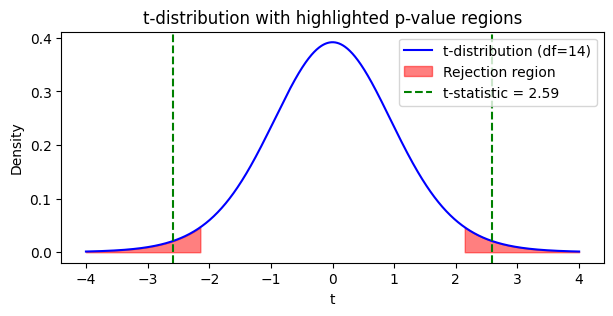

In [ ]:

# Weight loss data
data = [4.8, 5.2, 6.1, 4.7, 5.3, 5.5, 6.0, 5.8, 5.6, 4.9, 5.1, 5.4, 5.7, 4.6, 5.0]

n = len(data)
mean_sample = np.mean(data)
std_sample = np.std(data, ddof=1)
mu_0 = 5.0

# t-score
t_score = # Your code
df = n - 1
# Two-tailed p-value
p_value = # Your code

# Print results
print(f"Sample mean: {mean_sample:.2f}")
print(f"Sample standard deviation: {std_sample:.2f}")
print(f"t-score: {t_score:.2f}")
print(f"Degrees of freedom: {df}")
print(f"p-value: {p_value:.4f}", "\n")

# Plotting the t-distribution and highlighting the p-value region
x = np.linspace(-4, 4, 1000)
y = t.pdf(x, df)

# Critical t-values for two-tailed test
t_critical = t.ppf(1 - 0.025, df)

fig, ax = plt.subplots(figsize=(7, 3))
ax.plot(x, y, 'b-', label=f't-distribution (df={df})')

# Highlight the critical regions
x_fill_left = np.linspace(-4, -t_critical, 1000)
x_fill_right = np.linspace(t_critical, 4, 1000)
ax.fill_between(x_fill_left, t.pdf(x_fill_left, df), color='red', alpha=0.5, label='Rejection region')
ax.fill_between(x_fill_right, t.pdf(x_fill_right, df), color='red', alpha=0.5)

# Plot the t-score
ax.axvline(t_score, color='green', linestyle='--', label=f't-score = {t_score:.2f}')
ax.axvline(-t_score, color='green', linestyle='--')

# Labels and title
ax.set_title('t-distribution with highlighted p-value regions')
ax.set_xlabel('t')
ax.set_ylabel('Density')
ax.legend()

plt.show()

------------------
## Hypothesis Testing: F-test
Let us look into the the difference between the variances of the population and the sample data (or alternatively, variances of two sample datasets). We can formulate our hypotheses as follows:

- **Null Hypothesis (H$_0$)**: There is no difference between the population distribution variance and the $D_s$.

- **Alternative Hypothesis (H$_a$)**: There is a difference between them.

We use a statistical test to determine if we can reject the null hypothesis in favor of the alternative hypothesis. The ratio of the variances to each other, $\frac{\sigma_1^2}{\sigma_2^2}$, can be used as a metric to evaluate their similarity (indices 1 and 2 can be replaced by anything). We mentioned previously that the distribution of variance follows $\chi^2.$ It turns out that the ratio of two $\chi^2$ distribution follows $F$ distribution. Let us prove it in practice:


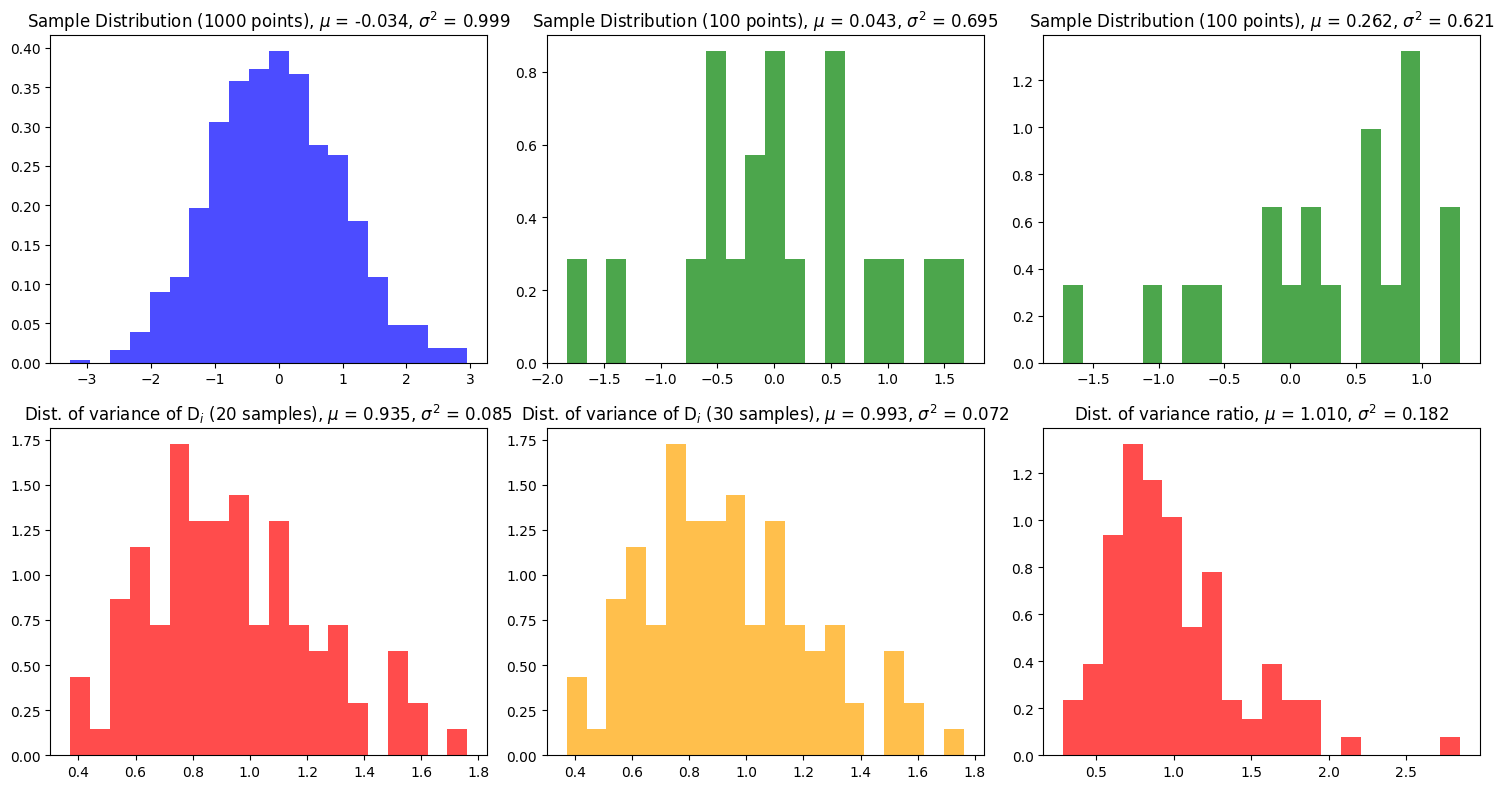

In [ ]:
# Create figure and subplots
fig, axs = plt.subplots(2, 3, figsize=(15, 8))
bins = 20

# Histogram of 500 data points sampled from a Gaussian distribution with mu = 0 and sigma = 1
data_1000 = np.random.normal(loc=0, scale=1, size=1000)
mu, var = np.mean(data_1000), np.var(data_1000)
axs[0, 0].hist(data_1000, bins=bins, alpha=0.7, color='blue', density="True")
axs[0, 0].set_title(r'Sample Distribution (1000 points), $\mu$ = %.3f, $\sigma^2$ = %.3f'%(mu, var))

# Histogram of 20 data points sampled from the same distribution
data_20 = np.random.normal(loc=0, scale=1, size=20)
mu, var = np.mean(data_20), np.var(data_20)
axs[0, 1].hist(data_20, bins=bins, alpha=0.7, color='green', density="True")
axs[0, 1].set_title('Sample Distribution (100 points), $\mu$ = %.3f, $\sigma^2$ = %.3f'%(mu, var))

# Histogram of another 20 data points sampled from the same distribution
data_30 = np.random.normal(loc=0, scale=1, size=20)
mu, var = np.mean(data_30), np.var(data_30)
axs[0, 2].hist(data_30, bins=bins, alpha=0.7, color='green', density="True")
axs[0, 2].set_title('Sample Distribution (100 points), $\mu$ = %.3f, $\sigma^2$ = %.3f'%(mu, var))

# Histogram of means and variances of D_i. Each sample dataset has 20 iid points
var_1, var_2 = [], []
for i in range(100):
  data_20_var = np.random.normal(loc=0.0, scale=1, size=20)
  var_1 += [np.var(data_20_var)]
  data_30_var = np.random.normal(loc=0.0, scale=1, size=30)
  var_2 += [np.var(data_30_var)]
var_1 = np.array(var_1)
var_2 = np.array(var_2)
axs[1, 0].hist(var_1, bins=bins, alpha=0.7, color='red', density="True")
axs[1, 0].set_title(r'Dist. of variance of D$_i$ (20 samples), $\mu$ = %.3f, $\sigma^2$ = %.3f'%(np.mean(var_1), np.var(var_1)))
axs[1, 1].hist(var_1, bins=bins, alpha=0.7, color='orange', density="True")
axs[1, 1].set_title(r'Dist. of variance of D$_i$ (30 samples), $\mu$ = %.3f, $\sigma^2$ = %.3f'%(np.mean(var_2), np.var(var_2)))

F = var_1/var_2
axs[1, 2].hist(F, bins=bins, alpha=0.7, color='red', density="True")
axs[1, 2].set_title(r'Dist. of variance ratio, $\mu$ = %.3f, $\sigma^2$ = %.3f'%(np.mean(F), np.var(F)))

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()


### F-distribution
Let us assume the random variable $F$ is defined as $F = \frac{X}{Y}$ where $X \sim \chi^2_{k_X}$ and $Y \sim \chi^2_{k_Y}$ where $\chi^2_k$ denotes the chi-squared distribution with $k$ degree of freedom. The question we are interested in is what the distribution of $F$ is?

We know that $\frac{\frac{\chi^2_{k_X}}{k_X}}{\frac{\chi^2_{k_Y}}{k_Y}}$ has F-distribtuion with $k_X$ and $k_Y$ degrees of freedom. Random variable F can be written as $\frac{\frac{\chi^2_{k_X}}{k_X}}{\frac{\chi^2_{k_Y}}{k_Y}}\frac{k_X}{k_Y}$ which can be proven to have a F-distribution $F(k_X, k_Y)$ (according to the previously mentioned explanations) as $\frac{k_X}{k_Y}$ acts only as a scaler.

Let us now examine ratio of variances.
We can write:

$$\sigma_1^2 \sim \chi^2_{k_1},$$
$$\sigma_2^2 \sim \chi^2_{k_2}.$$

We now know that the ratio of two random variables with normalized $\chi^2$ distributions follows an F distribution. Therefore

$$\frac{\sigma_1^2}{\sigma_2^2} \sim F(k_1, k_2).$$

### Decision Making

Based on the p-value computed using the $F$ score calculated above, we can decide whether to reject the null hypothesis. Typically, a significance level (alpha) of 0.05 is used.

- If p-value $\leq \alpha$: Reject the null hypothesis (significant difference)
- If p-value $> \alpha$: Fail to reject the null hypothesis (no significant difference)

**Question:** How do we calculate the p-value mathematically?

<!--
# Copyright © 2024 Meysam Goodarzi
This notebook is licensed under CC BY-NC 4.0 with the following amandments:
- Individual may use, share, and adapt this material for non-commercial purposes with attribution.
- Institutions/Companies must obtain written consent to use this material, except for nonprofits.
- Commercial use is prohibited without permission.  
Contact: analytica@meysam-goodarzi.com.
-->


--------------------
#### Exercise 4
We have two different teaching methods and we want to compare the variability in student test scores between these two methods. We have collected test scores from students who were taught using Method A and Method B.

Sample variance of scores_A: 10.27
Sample variance of scores_B: 9.17
F-statistic: 1.12
Degrees of freedom for scores_A: 9
Degrees of freedom for scores_B: 9
p-value: 0.4344 



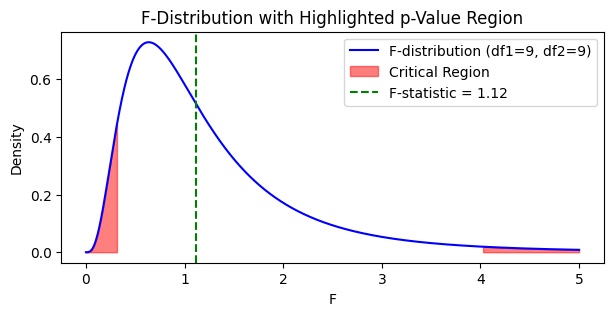

In [ ]:
# Sample data
scores_A = [88, 92, 85, 91, 89, 95, 90, 87, 94, 93]
scores_B = [72, 75, 78, 70, 77, 73, 76, 74, 71, 69]

# Sample sizes
n_A, n_B = len(scores_A), len(scores_B)

# Sample variances
var_A, var_B = np.var(scores_A, ddof=1), np.var(scores_B, ddof=1)

# F-score
F_score = # Your code

# Degrees of freedom
df1, df2 = n_A - 1, # Your code

# p-value from the F-distribution
p_value = # Your code

# Print results
print(f"Sample variance of scores_A: {var_A:.2f}")
print(f"Sample variance of scores_B: {var_B:.2f}")
print(f"F-score: {F_score:.2f}")
print(f"Degrees of freedom for scores_A: {df1}")
print(f"Degrees of freedom for scores_B: {df2}")
print(f"p-value: {p_value:.4f}", "\n")

# Plotting the F-distribution and highlighting the p-value region
x = np.linspace(0, 5, 1000)
y = f.pdf(x, df1, df2)

fig, ax = plt.subplots(figsize=(7, 3))
ax.plot(x, y, 'b-', label=f'F-distribution (df1={df1}, df2={df2})')

# Critical F-value for a two-tailed test at alpha = 0.05
alpha = 0.05
F_critical_right = f.ppf(1 - alpha/2, df1, df2)
F_critical_left = f.ppf(alpha/2, df1, df2)

# Highlight the critical regions
x_fill_right = np.linspace(F_critical_right, 5, 1000)
ax.fill_between(x_fill_right, f.pdf(x_fill_right, df1, df2), color='red', alpha=0.5, label='Critical Region')
x_fill_left = np.linspace(0, F_critical_left, 1000)
ax.fill_between(x_fill_left, f.pdf(x_fill_left, df1, df2), color='red', alpha=0.5)

ax.axvline(F_score, color='green', linestyle='--', label=f'F-score = {F_score:.2f}')

# Labels and title
ax.set_title('F-Distribution with Highlighted p-Value Region')
ax.set_xlabel('F')
ax.set_ylabel('Density')
ax.legend()

plt.show()


-----------------------------------------------
## Case Study (Exercise 5)
We analyze the data from an experiment that evaluates the effectiveness of a program that offers teachers in Italian middle schools the chance to participate in a training. The training is designed to help them promote inclusive practices in the classroom. The experiment was designed as a randomized control trial (RCT). Here, we will clean the data from this experiment and perform some basic analyses.

##### Introduction to the Dataset
Contain administrative information on students’ characteristics and academic performance. The data are organized at the student level and contain the following variables:
- **school_id** : A variable that identifies in which school the student is enrolled.
- **grade**: A variable that identifies students’ grade.
- **class**: A variable that identifies students’ class. In our setting, students are enrolled in only one school-grade-class.
- **student_id** : A variable containing an unique identifier for students (their email address).
- **sex**: A variable that identifies students’ sex. 1 refers to female students and 2 to male students.
- **nationality**: A variable that identifies students’ nationality. 1 refers to students with Italian citizenship and 2 to foreign students.
- **grade_math_t1** : Students’ grade in math at period 1 (i.e. before the intervention)
- **grade_language_t1** : Students’ grade in language at period 1 (i.e. before the intervention)
- **grade_science_t1** : Students’ grade in science at period 1 (i.e. before the intervention)
- **grade_math_t2** : Students’ grade in math at period 2 (i.e. after the intervention)
- **grade_language_t2** : Students’ grade in language at period 2 (i.e. after the intervention)
- **grade_science_t2** : Students’ grade in science at period 2 (i.e. after the intervention)
- **treatment**: A variable indicating if the student was taught by a teacher who was assigned to the treatment group.

**Note**: The italian grade system grades students from 0 to 10.

##### Loading the dataset

In [ ]:
df = pd.read_csv("https://drive.google.com/uc?id=1znf0o6-4IqQ7EtvRCZxVYtjUjBNCmZuP")

##### Visualization
Plot the distributions for the first quintiles for 4 cases,
1. period 1, qurtile 1, and treatment=0,
1. period 1, qurtile 1, and treatment=1,
1. period 2, qurtile 1, and treatment=0,
1. period 2, qurtile 1, and treatment=1.

Compare the results and write down your thoughts as a comment in your code.

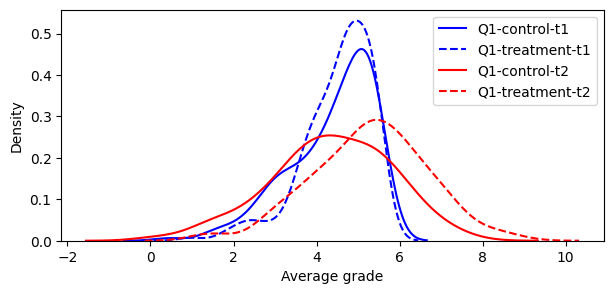

In [ ]:
fig, ax = plt.subplots(figsize=(7, 3))

quartile = "Q1"

# Kernel Density Estimate (KDE plot)
sb.kdeplot(df[(df['avg_t1_q'] == quartile)&(df['treatment'] == 0)]["avg_t1"], color="b")
sb.kdeplot(df[(df['avg_t1_q'] == quartile)&(df['treatment'] == 1)]["avg_t1"], color="b", linestyle="dashed")
sb.kdeplot(df[(df['avg_t1_q'] == quartile)&(df['treatment'] == 0)]["avg_t2"], color="r")
sb.kdeplot(df[(df['avg_t1_q'] == quartile)&(df['treatment'] == 1)]["avg_t2"], color="r", linestyle="dashed")

plt.legend([f"{quartile}-control-t1", f"{quartile}-treatment-t1", f"{quartile}-control-t2", f"{quartile}-treatment-t2"])
plt.xlabel('Average grade')
plt.ylabel('Density')
plt.show()

##### Z-test
In the dataset above, the variable treatment determines if the student belongs to the treatment group (treatment=1) or control group (treatment=0). Can you determine if the treatment is effective? on which quantile the effect has not been significant?

Number of data points in control group = 182 
 Number of data points in treatment group = 193 
 STD of control group =  1.466 
 STD of treatment group =  1.388 
 STD of mean difference of treatment and control =  0.148 
 z_score =  6.271 
 p-value =  0.000 



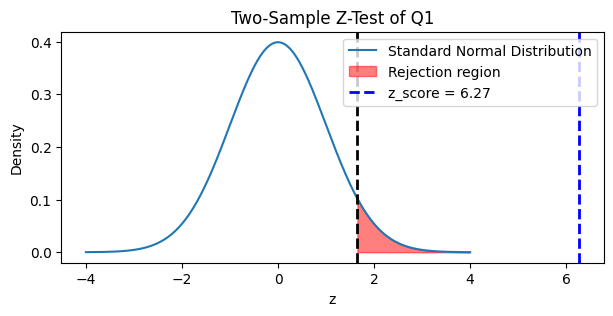

In [ ]:
quartile = "Q1"

# Calculate the population mean (control group)
N_c = len(df[(df['avg_t1_q'] == quartile)&(df['treatment'] == 0)]["avg_t2"])
mu_c = # Your code
sigma_c = np.std(df[(df['avg_t1_q'] == quartile)&(df['treatment'] == 0)]["avg_t2"], ddof=1)

# Calculate the length, mean and std of sample (treatment group)
N_t = # Your code
mu_t = np.mean(df[(df['avg_t1_q'] == quartile)&(df['treatment'] == 1)]["avg_t2"])
sigma_t = # Your code

# Calculate the std of mean of each potential sample data from the population (population std)
sigma_diff = (sigma_c**2/N_c + sigma_t**2/N_t)**0.5
z_score = # Your code

# Two-sided p-value
p_value = # Your code
print("Number of data points in control group =", N_c, "\n",
      "Number of data points in treatment group =", N_t, "\n",
      f"STD of control group = {sigma_c: .3f}", "\n",
      f"STD of treatment group = {sigma_t: .3f}", "\n",
      f"STD of mean difference of treatment and control = {sigma_diff: .3f}","\n",
      f"z_score = {z_score: .3f}", "\n",
      f"p-value = {p_value: .3f}", "\n")

# Critical z-value for one-tailed test at alpha = 0.05
alpha = 0.05
z_critical = norm.ppf(1 - alpha)

# Plot the z-distribution and the critical regions
x = np.linspace(-4, 4, 400)
y = norm.pdf(x)

plt.figure(figsize=(7, 3))
plt.plot(x, y, label='Standard Normal Distribution')
plt.fill_between(x, 0, y, where=(x > z_critical), color='red', alpha=0.5, label='Rejection region')
plt.axvline(z_score, color='blue', linestyle='dashed', linewidth=2, label=f'z_score = {z_score:.2f}')
plt.axvline(z_critical, color='black', linestyle='dashed', linewidth=2)
plt.title(f'Two-Sample Z-Test of {quartile}')
plt.legend()
plt.xlabel('z')
plt.ylabel('Density')
plt.show()

Now compare the difference between the two periods for different groups? What can you conlude?

Number of data points in control group = 182 
 Number of data points in treatment group = 193 
 STD of control group =  1.014 
 STD of treatment group =  1.133 
 STD of mean difference of treatment and control =  0.111 
 z_score =  6.971 
 p-value =  0.000 



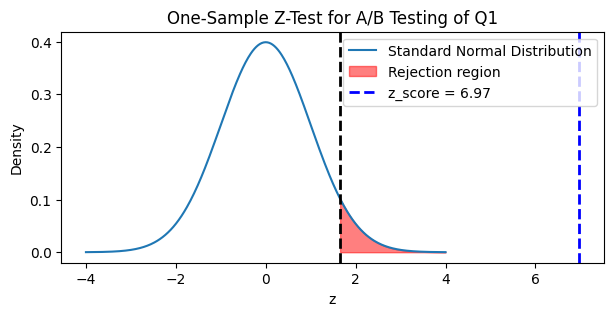

In [ ]:
# Calculate the population mean (control group)
control_diff = (
    df[(df['avg_t1_q'] == quartile)&(df['treatment'] == 0)]["avg_t2"]
    - df[(df['avg_t1_q'] == quartile)&(df['treatment'] == 0)]["avg_t1"]
              )
N_c = len(control_diff)
mu_c = # Your code
sigma_c = np.std(control_diff, ddof=1)

# Calculate the length, mean and std of sample (treatment group)
treatment_diff = (
    # Your code
              )
N_t = len(treatment_diff)
mu_t = np.mean(treatment_diff)
sigma_t = # Your code

# Calculate the std of mean of each potential sample data from the population
sigma_diff = (sigma_c**2/N_c + sigma_t**2/N_t)**0.5
z_score = np.abs(mu_t-mu_c)/sigma_diff

# Two-sided p-value
p_value = 2*(1 - norm.cdf(z_score))
print("Number of data points in control group =", N_c, "\n",
      "Number of data points in treatment group =", N_t, "\n",
      f"STD of control group = {sigma_c: .3f}", "\n",
      f"STD of treatment group = {sigma_t: .3f}", "\n",
      f"STD of mean difference of treatment and control = {sigma_diff: .3f}","\n",
      f"z_score = {z_score: .3f}", "\n",
      f"p-value = {p_value: .3f}", "\n")

# Critical z-value for one-tailed test at alpha = 0.05
alpha = 0.05
z_critical = norm.ppf(1 - alpha)

# Plot the z-distribution and the critical regions
x = np.linspace(-4, 4, 400)
y = norm.pdf(x)

plt.figure(figsize=(7, 3))
plt.plot(x, y, label='Standard Normal Distribution')
plt.fill_between(x, 0, y, where=(x > z_critical), color='red', alpha=0.5, label='Rejection region')
plt.axvline(z_score, color='blue', linestyle='dashed', linewidth=2, label=f'z_score = {z_score:.2f}')
plt.axvline(z_critical, color='black', linestyle='dashed', linewidth=2)
plt.title(f'Two-Sample Z-Test for A/B Testing of {quartile}')
plt.legend()
plt.xlabel('z')
plt.ylabel('Density')
plt.show()

##### t-test
Repeat the above procedure for the t-test. How would you approach the problem?

Number of data points in control group = 182 
 Number of data points in treatment group = 193 
 STD of control group =  1.466 
 STD of treatment group =  1.388 
 STD of mean difference of treatment and control =  1.427 
 z_score =  6.264 
 P-value =  0.000 



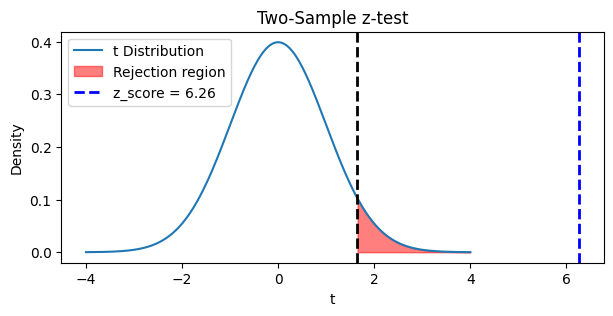

In [ ]:
quartile = "Q1"

# Calculate the population mean (control group)
N_c = len(df[(df['avg_t1_q'] == quartile)&(df['treatment'] == 0)]["avg_t2"])
mu_c = np.mean(df[(df['avg_t1_q'] == quartile)&(df['treatment'] == 0)]["avg_t2"])
sigma_c = np.std(df[(df['avg_t1_q'] == quartile)&(df['treatment'] == 0)]["avg_t2"], ddof=1)

# Calculate the length, mean and std of sample (treatment group)
N_t = len(df[(df['avg_t1_q'] == quartile)&(df['treatment'] == 1)]["avg_t2"])
mu_t = np.mean(df[(df['avg_t1_q'] == quartile)&(df['treatment'] == 1)]["avg_t2"])
sigma_t = np.std(df[(df['avg_t1_q'] == quartile)&(df['treatment'] == 1)]["avg_t2"], ddof=1)

# Calculate the std of mean of each potential sample data from the population
sigma_diff = (
    ((N_c-1)*sigma_c**2 + (N_t-1)*sigma_t**2)/(N_c+N_t-2)
    )**0.5
t_score = np.abs(mu_t-mu_c)/(sigma_diff*(1/(N_c-1) + 1/(N_t-1))**0.5)

# Two-sided p-value
p_value = 2*(1 - t.cdf(t_score, N_c+N_t-2))
print("Number of data points in control group =", N_c, "\n",
      "Number of data points in treatment group =", N_t, "\n",
      f"STD of control group = {sigma_c: .3f}", "\n",
      f"STD of treatment group = {sigma_t: .3f}", "\n",
      f"STD of mean difference of treatment and control = {sigma_diff: .3f}","\n",
      f"t_score = {t_score: .3f}", "\n",
      f"P-value = {p_value: .3f}", "\n")

# Critical z-value for one-tailed test at alpha = 0.05
alpha = 0.05
t_critical = t.ppf(1 - alpha, N_c+N_t-2)

# Plot the z-distribution and the critical regions
x = np.linspace(-4, 4, 400)
y = t.pdf(x, N_c+N_t-2)

plt.figure(figsize=(7, 3))
plt.plot(x, y, label='t Distribution')
plt.fill_between(x, 0, y, where=(x > t_critical), color='red', alpha=0.5, label='Rejection region')
plt.axvline(t_score, color='blue', linestyle='dashed', linewidth=2, label=f't_score = {t_score:.2f}')
plt.axvline(t_critical, color='black', linestyle='dashed', linewidth=2)
plt.title('Two-Sample t-test')
plt.legend()
plt.xlabel('t')
plt.ylabel('Density')
plt.show()

Number of data points in control group = 182 
 Number of data points in treatment group = 193 
 STD of control group =  1.014 
 STD of treatment group =  1.133 
 STD of mean difference of treatment and control =  1.077 
 z_score =  6.930 
 P-value =  0.000 



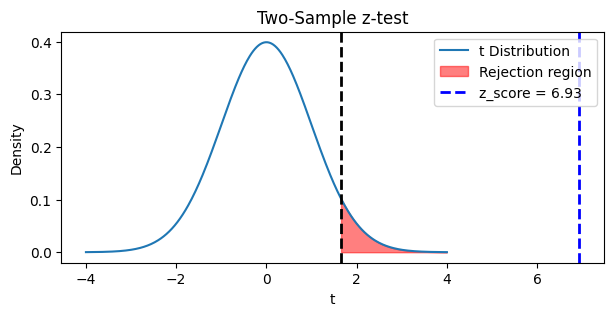

In [ ]:
# Calculate the population mean (control group)
control_diff = (
    df[(df['avg_t1_q'] == quartile)&(df['treatment'] == 0)]["avg_t2"]
    - df[(df['avg_t1_q'] == quartile)&(df['treatment'] == 0)]["avg_t1"]
              )
N_c = len(control_diff)
mu_c = np.mean(control_diff)
sigma_c = np.std(control_diff, ddof=1)

# Calculate the length, mean and std of sample (treatment group)
treatment_diff = (
    df[(df['avg_t1_q'] == quartile)&(df['treatment'] == 1)]["avg_t2"]
    - df[(df['avg_t1_q'] == quartile)&(df['treatment'] == 1)]["avg_t1"]
              )
N_t = len(treatment_diff)
mu_t = np.mean(treatment_diff)
sigma_t = np.std(treatment_diff, ddof=1)

# Calculate the std of mean of each potential sample data from the population
sigma_diff = (
    ((N_c-1)*sigma_c**2 + (N_t-1)*sigma_t**2)/(N_c+N_t-2)
    )**0.5
t_score = np.abs(mu_t-mu_c)/(sigma_diff*(1/(N_c-1) + 1/(N_t-1))**0.5)

# Two-sided p-value
p_value = 2*(1 - t.cdf(t_score, N_c+N_t-2))
print("Number of data points in control group =", N_c, "\n",
      "Number of data points in treatment group =", N_t, "\n",
      f"STD of control group = {sigma_c: .3f}", "\n",
      f"STD of treatment group = {sigma_t: .3f}", "\n",
      f"STD of mean difference of treatment and control = {sigma_diff: .3f}","\n",
      f"t_score = {t_score: .3f}", "\n",
      f"P-value = {p_value: .3f}", "\n")

# Critical z-value for one-tailed test at alpha = 0.05
alpha = 0.05
t_critical = t.ppf(1 - alpha, N_c+N_t-2)

# Plot the z-distribution and the critical regions
x = np.linspace(-4, 4, 400)
y = t.pdf(x, N_c+N_t-2)

plt.figure(figsize=(7, 3))
plt.plot(x, y, label='t Distribution')
plt.fill_between(x, 0, y, where=(x > t_critical), color='red', alpha=0.5, label='Rejection region')
plt.axvline(t_score, color='blue', linestyle='dashed', linewidth=2, label=f't_score = {t_score:.2f}')
plt.axvline(t_critical, color='black', linestyle='dashed', linewidth=2)
plt.title('Two-Sample t-test')
plt.legend()
plt.xlabel('t')
plt.ylabel('Density')
plt.show()

##### F-test
Is there a significant difference between the variances of control and treatment groups before and after the treatment?

Number of data points in the sample = 182 
 Variance of control group =  1.023 
 Variance of treatment group =  1.278 
 F_score =  1.249 
 P-value =  0.064 



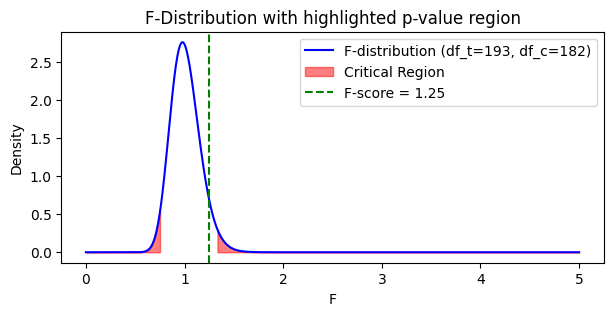

In [ ]:
quartile = "Q1"

# Calculate the variance of grade difference of control group
var_c = np.var(
    df[(df['avg_t1_q'] == quartile)&(df['treatment'] == 0)]["avg_t2"]
    - df[(df['avg_t1_q'] == quartile)&(df['treatment'] == 0)]["avg_t1"]
             )

# Calculate the variance of grade difference of treatment group
df_c = len(df[(df['avg_t1_q'] == quartile)&(df['treatment'] == 0)]["avg_t2"])
df_t = len(df[(df['avg_t1_q'] == quartile)&(df['treatment'] == 1)]["avg_t2"])
var_t = np.var(
    df[(df['avg_t1_q'] == quartile)&(df['treatment'] == 1)]["avg_t2"]
    - df[(df['avg_t1_q'] == quartile)&(df['treatment'] == 1)]["avg_t1"]
    )

# Calculate the ratio of variances
F_score = var_t/var_c

# Two-sided p-value
p_value = 1 - f.cdf(F_score, df_c, df_t)
print("Number of data points in the sample =", df_c, "\n",
      f"Variance of control group = {var_c: .3f}","\n",
      f"Variance of treatment group = {var_t: .3f}", "\n",
      f"F_score = {F_score: .3f}", "\n",
      f"P-value = {p_value: .3f}", "\n")

# Plotting the F-distribution and highlighting the p-value region
x = np.linspace(0, 5, 1000)
y = f.pdf(x, df_t, df_c)

fig, ax = plt.subplots(figsize=(7, 3))
ax.plot(x, y, 'b-', label=f'F-distribution (df_t={df_t}, df_c={df_c})')

# Critical F-value for a two-tailed test at alpha = 0.05
alpha = 0.05
F_critical_right = f.ppf(1 - alpha/2, df_t, df_c)
F_critical_left = f.ppf(alpha/2, df_t, df_c)

# Highlight the critical regions
x_fill_right = np.linspace(F_critical_right, 5, 1000)
ax.fill_between(x_fill_right, f.pdf(x_fill_right, df_t, df_c), color='red', alpha=0.5, label='Critical Region')
x_fill_left = np.linspace(0, F_critical_left, 1000)
ax.fill_between(x_fill_left, f.pdf(x_fill_left, df_t, df_c), color='red', alpha=0.5)

ax.axvline(F_score, color='green', linestyle='--', label=f'F-score = {F_score:.2f}')

# Labels and title
ax.set_title('F-Distribution with highlighted p-value region')
ax.set_xlabel('F')
ax.set_ylabel('Density')
ax.legend()

plt.show()

**Congratulations! You have finished the Notebook! Great Job!**
🤗🙌👍👏💪
<!--
# Copyright © 2024 Meysam Goodarzi
This notebook is licensed under CC BY-NC 4.0 with the following amandments:
- Individuals may use, share, and adapt this material for non-commercial purposes with attribution.
- Institutions/Companies must obtain written consent to use this material, except for nonprofits.
- Commercial use is prohibited without permission.  
Contact: analytica@meysam-goodarzi.com.
-->